In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2
import matplotlib as mpl
import matplotlib.pyplot as plt
from IPython.display import display
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from imutils import paths
import argparse
import imutils
from sklearn.model_selection import StratifiedKFold
from statistics import mean
from sklearn.metrics import *
from sklearn import metrics
import itertools 


# Reading in data...

In [ ]:
from google.colab import drive
drive.mount('/gdrive', force_remount=True)


Mounted at /gdrive


In [ ]:
ls /gdrive

MyDrive/  Shareddrives/


In [ ]:
source_path = "/gdrive"

In [ ]:
ls /gdrive/MyDrive/AML_group13/Data/2A_images_sample/test

COVID-19/  Normal/  Pneumonia/


In [ ]:
import os
for dirname, _, filenames in os.walk(source_path+'/MyDrive/AML_group13/Data/2A_images_sample'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
train_imagePaths = []
for dirname, _, filenames in os.walk(source_path+'/MyDrive/AML_group13/Data/2A_images_sample/train'):
    for filename in filenames:
        if (filename[-3:] == 'png'):
            train_imagePaths.append(os.path.join(dirname, filename))
val_imagePaths = []
for dirname, _, filenames in os.walk(source_path+'/MyDrive/AML_group13/Data/2A_images_sample/val'):
    for filename in filenames:
        if (filename[-3:] == 'png'):
            val_imagePaths.append(os.path.join(dirname, filename))
test_imagePaths = []
for dirname, _, filenames in os.walk(source_path+'/MyDrive/AML_group13/Data/2A_images_sample/test'):
    for filename in filenames:
        if (filename[-3:] == 'png'):
            test_imagePaths.append(os.path.join(dirname, filename))

In [ ]:
print(len(train_imagePaths), len(val_imagePaths), len(test_imagePaths))

9000 1800 1800


(128, 128, 3)


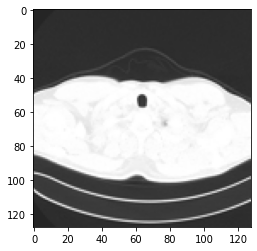

In [ ]:
image = cv2.imread(train_imagePaths[0])
print(image.shape)
plt.imshow(image)
plt.show()

# Data Processing

The following part of processing the images where the images are flattened and converted to color histograms are referred from the document "https://www.pyimagesearch.com/2016/08/08/k-nn-classifier-for-image-classification/".

In [ ]:
def image_to_feature_vector(image, size=(32, 32)):
    # resize the image to a fixed size, then flatten the image into
    # a list of raw pixel intensities
    return cv2.resize(image, size).flatten()

In [ ]:
def extract_color_histogram(image, bins=(8, 8, 8)):
    # extract a 3D color histogram from the HSV color space using
    # the supplied number of `bins` per channel
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    hist = cv2.calcHist([hsv], [0, 1, 2], None, bins,[0, 180, 0, 256, 0, 256])
    
    if imutils.is_cv2():
        hist = cv2.normalize(hist)
    
    else:
        cv2.normalize(hist, hist)
    # return the flattened histogram as the feature vector
    return hist.flatten()

In [ ]:
test_rawImages = []
test_features = []
test_labels = []
test_img=[]

for imagePath in test_imagePaths:
    print(imagePath)
    label = imagePath.split(os.path.sep)[-2]
    image = cv2.imread(imagePath)
    # extract raw pixel intensity "features", followed by a color
    # histogram to characterize the color distribution of the pixels
    # in the image
    pixels = image_to_feature_vector(image)
    hist = extract_color_histogram(image)
    test_rawImages.append(pixels)
    test_features.append(hist)
    test_labels.append(label)
    test_img.append(image)


val_rawImages = []
val_features = []
val_labels = []
val_img=[]

for imagePath in val_imagePaths:
    print(imagePath)
    label = imagePath.split(os.path.sep)[-2]
    image = cv2.imread(imagePath)
    # extract raw pixel intensity "features", followed by a color
    # histogram to characterize the color distribution of the pixels
    # in the image
    pixels = image_to_feature_vector(image)
    hist = extract_color_histogram(image)
    val_rawImages.append(pixels)
    val_features.append(hist)
    val_labels.append(label)
    val_img.append(image)


train_rawImages = []
train_features = []
train_labels = []
train_img=[]

for imagePath in train_imagePaths:
    print(imagePath)
    label = imagePath.split(os.path.sep)[-2]
    image = cv2.imread(imagePath)
    # extract raw pixel intensity "features", followed by a color
    # histogram to characterize the color distribution of the pixels
    # in the image
    pixels = image_to_feature_vector(image)
    hist = extract_color_histogram(image)
    train_rawImages.append(pixels)
    train_features.append(hist)
    train_labels.append(label)
    train_img.append(image)







In [ ]:
rawImages = np.array(test_rawImages)
features = np.array(test_features)
labels = np.array(test_labels)
print("[INFO] pixels matrix: {:.2f}MB".format(rawImages.nbytes / (1024 * 1000.0)))
print("[INFO] features matrix: {:.2f}MB".format(features.nbytes / (1024 * 1000.0)))

[INFO] pixels matrix: 5.40MB
[INFO] features matrix: 3.60MB


#Trying out different tranditional ML Model

In [ ]:
from sklearn.naive_bayes import GaussianNB

trainRI2, testRI2 = train_rawImages, val_rawImages
trainRL2, testRL2 = train_labels, val_labels
model=GaussianNB()
model.fit(trainRI2, trainRL2)
acc = model.score(testRI2, testRL2)
yhat=model.predict(testRI2)
accround=round(acc,2)
accuracy=accuracy_score(testRL2, yhat)
recall= recall_score(testRL2, yhat, average='macro')
    
print("Raw pixel accuracy for Naive Bayes is: {:.2f}%".format(accuracy * 100))
print("Raw pixel recall for Naive Bayes is: {:.2f}%".format(recall * 100))


Raw pixel accuracy for Naive Bayes is: 46.89%
Raw pixel recall for Naive Bayes is: 46.89%


In [ ]:
trainFeat2, testFeat2 = train_features, val_features
trainLabels2, testLabels2 = train_labels, val_labels
modelNB=GaussianNB()
modelNB.fit(trainFeat2, trainLabels2)
acc = modelNB.score(testFeat2, testLabels2)
yhat=modelNB.predict(testFeat2)
accround=round(acc,2)
accuracy=accuracy_score(testLabels2, yhat)
recall= recall_score(testLabels2, yhat, average='macro')

print("Histogram accuracy for Naive Bayes is: {:.2f}%".format(accuracy * 100))
print("Histogram recall for Naive Bayes is: {:.2f}%".format(recall * 100))


Histogram accuracy for Naive Bayes is: 62.17%
Histogram recall for Naive Bayes is: 62.17%


In [ ]:
from sklearn.svm import SVC

trainFeat2, testFeat2 = train_features, val_features
trainLabels2, testLabels2 = train_labels, val_labels
modelSVC= SVC(kernel = 'linear')
modelSVC.fit(trainFeat2, trainLabels2)
acc = modelSVC.score(testFeat2, testLabels2)
yhat=modelSVC.predict(testFeat2)
accround=round(acc,2)
accuracy=accuracy_score(testLabels2, yhat)
recall= recall_score(testLabels2, yhat, average='macro')
print("Histogram accuracy for SVC is: {:.2f}%".format(accuracy * 100))
print("Histogram recall for SVC is: {:.2f}%".format(recall * 100))



Histogram accuracy for SVC is: 66.83%
Histogram recall for SVC is: 66.83%


In [ ]:
from sklearn.svm import LinearSVC


trainFeat2, testFeat2 = train_features, val_features
trainLabels2, testLabels2 = train_labels, val_labels
modelLinearSVC = LinearSVC(loss = "hinge")
modelLinearSVC.fit(trainFeat2, trainLabels2)
acc = modelLinearSVC.score(testFeat2, testLabels2)
yhat=modelLinearSVC.predict(testFeat2)
accround=round(acc,2)
accuracy=accuracy_score(testLabels2, yhat)
recall= recall_score(testLabels2, yhat, average='macro')
print("Histogram accuracy for lienar SVC is: {:.2f}%".format(accuracy * 100))
print("Histogram recall for linear SVC is: {:.2f}%".format(recall * 100))



Histogram accuracy for lienar SVC is: 58.89%
Histogram recall for linear SVC is: 58.89%


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [ ]:
trainRI2, testRI2 = train_rawImages, val_rawImages
trainRL2, testRL2 = train_labels, val_labels
modelLinearSVC = LinearSVC(loss = "hinge")
modelLinearSVC.fit(trainRI2, trainRL2)
acc = modelLinearSVC.score(testRI2, testRL2)
yhat=modelLinearSVC.predict(testRI2)
accround=round(acc,2)
accuracy=accuracy_score(testRL2, yhat)
recall= recall_score(testRL2, yhat, average='macro')
    
print("Raw pixel accuracy for lienar SVC is: {:.2f}%".format(accuracy * 100))
print("Raw pixel recall for lienar SVC is: {:.2f}%".format(recall * 100))


Raw pixel accuracy for lienar SVC is: 58.33%
Raw pixel recall for lienar SVC is: 58.33%


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [ ]:
from sklearn.ensemble import RandomForestClassifier


trainRI2, testRI2 = train_rawImages, val_rawImages
trainRL2, testRL2 = train_labels, val_labels
modelRF = RandomForestClassifier(random_state=0)
modelRF.fit(trainRI2, trainRL2)
acc = modelRF.score(testRI2, testRL2)
yhat=modelRF.predict(testRI2)
accround=round(acc,2)
accuracy=accuracy_score(testRL2, yhat)
recall= recall_score(testRL2, yhat, average='macro')
    
print("Raw pixel accuracy for modelRF is: {:.2f}%".format(accuracy * 100))
print("Raw pixel recall for modelRF is: {:.2f}%".format(recall * 100))

Raw pixel accuracy for modelRF is: 90.22%
Raw pixel recall for modelRF is: 90.22%


In [ ]:
trainFeat2, testFeat2 = train_features, val_features
trainLabels2, testLabels2 = train_labels, val_labels
modelRF = RandomForestClassifier(random_state=0)
modelRF.fit(trainFeat2, trainLabels2)
acc = modelRF.score(testFeat2, testLabels2)
yhat=modelRF.predict(testFeat2)
accround=round(acc,2)
accuracy=accuracy_score(testLabels2, yhat)
recall= recall_score(testLabels2, yhat, average='macro')
print("Histogram accuracy for modelRF is: {:.2f}%".format(accuracy * 100))
print("Histogram recall for modelRF is: {:.2f}%".format(recall * 100))


Histogram accuracy for modelRF is: 81.11%
Histogram recall for modelRF is: 81.11%


### Hyperparameter Tuning


In [ ]:
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 
param_grid = {
    'n_estimators': [int(x) for x in np.linspace(start = 20, stop = 60, num = 3)] ,
    'max_depth': [None] + [int(x) for x in np.linspace(start = 3, stop = 9, num = 3)]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

# Fit the grid search to the data
grid_search.fit(trainRI2, trainRL2)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 3, 6, 9],
                         'n_estimators': [20, 40, 60]},
             verbose=2)

In [ ]:
best_grid = grid_search.best_estimator_
best_grid

RandomForestClassifier(n_estimators=60)

### Evaluation on test set

In [ ]:
predicted_y_test = best_grid.predict(test_rawImages)
predicted_y_train = best_grid.predict(val_rawImages)
print('development data accuracy is ', accuracy_score(predicted_y_train, val_labels))
print('test data accuracy is ', accuracy_score(predicted_y_test, test_labels))

development data accuracy is  0.8972222222222223
test data accuracy is  0.9066666666666666


We fed in the data in two different forms, the raw data and the extracted 3D color histogram from the HSV color space. We also tried out different model including Naive Bayes, SVM and Random Forest. The best accuracy score we got on the validation test is 0.9028 from Random Forest, and the test accuracy is 0.90.

# Confusion Matrix Analysis

In [ ]:
from sklearn.metrics import confusion_matrix
classes = ['COVID-19','Normal','Penumonia']

y_predict = predicted_y_test


In [ ]:
def plot_confusion_matrix(cm, classes, normalize, title, cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(6,6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Normalized confusion matrix
Confusion matrix, without normalization


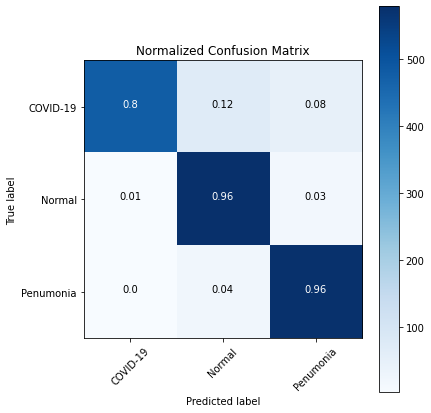

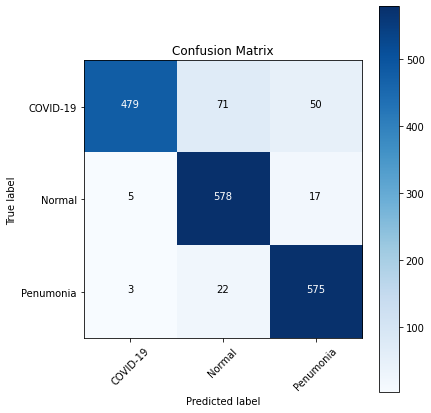

In [ ]:
#print(test_labels)
cm = confusion_matrix(test_labels, y_predict)
plot_confusion_matrix(cm, classes,True, title='Normalized Confusion Matrix')
plot_confusion_matrix(cm, classes,False, title='Confusion Matrix')


# Evaluation matrics by class

In [ ]:
from sklearn.metrics import precision_recall_fscore_support
import seaborn as sns
def generate_evaluation(y_true, predictions):
  acc = accuracy_score(y_true, predictions)
  results_all = precision_recall_fscore_support(y_true, predictions, average='macro', zero_division=1)
  results_class = precision_recall_fscore_support(y_true, predictions, average=None, zero_division=1)

  metric_columns =  ['Precision','Recall', 'F-Score','S']
  all_df = pd.concat([pd.DataFrame(list(results_class)).T,pd.DataFrame(list(results_all)).T])
  all_df.columns = metric_columns
  all_df.index = classes + ['Total']

  def metrics_plot(df,metric):
      plt.figure(figsize=(10,5))
      ax = sns.barplot(data =df, x=df.index, y = metric,palette = "Blues_d")
      #Bar Labels
      for p in ax.patches:
          ax.annotate("%.1f%%" % (100*p.get_height()), (p.get_x() + p.get_width() / 2., abs(p.get_height())),
          ha='center', va='bottom', color='black', xytext=(-3, 5),rotation = 'horizontal',textcoords='offset points')
          
      sns.despine(top=True, right=True, left=True, bottom=False)
      ax.set_xlabel('Class',fontsize = 14,weight = 'bold')
      ax.set_ylabel(metric,fontsize = 14,weight = 'bold')
      ax.set(yticklabels=[])
      ax.axes.get_yaxis().set_visible(False) 
      plt.title(metric+ ' Results per Class', fontsize = 16,weight = 'bold');
  metrics_plot(all_df, 'Precision')#Results by Class
  metrics_plot(all_df, 'Recall')#Results by Class
  metrics_plot(all_df, 'F-Score')#Results by Class
  print('**Overall Results**')
  print('Accuracy Result: %.2f%%'%(acc*100)) #Accuracy of the whole Dataset
  print('Precision Result: %.2f%%'%(all_df.iloc[3,0]*100))#Precision of the whole Dataset
  print('Recall Result: %.2f%%'%(all_df.iloc[3,1]*100))#Recall of the whole Dataset
  print('F-Score Result: %.2f%%'%(all_df.iloc[3,2]*100))#F-Score of the whole Dataset


**Overall Results**
Accuracy Result: 90.67%
Precision Result: 91.35%
Recall Result: 90.67%
F-Score Result: 90.56%


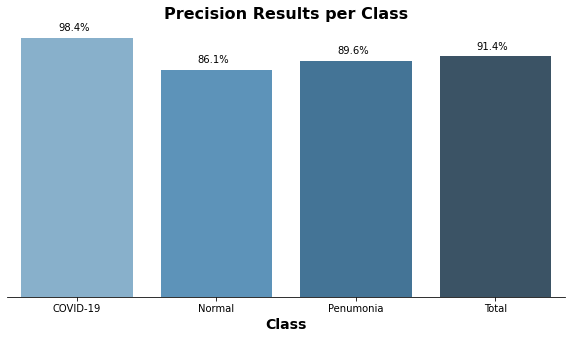

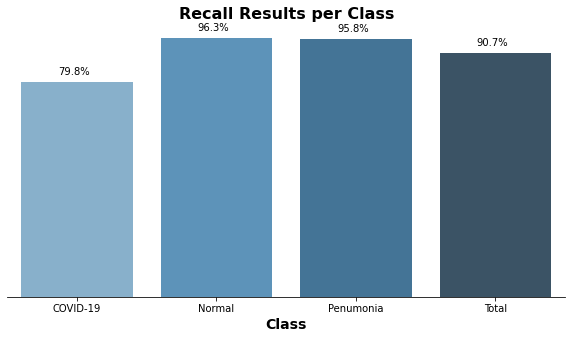

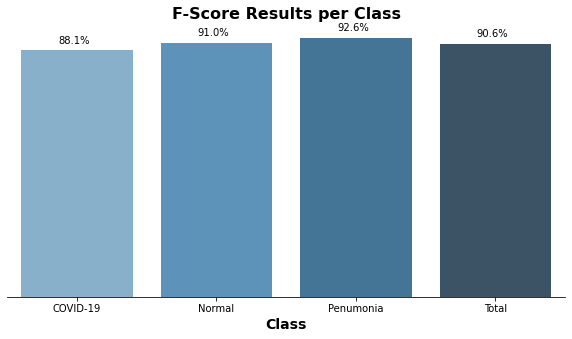

In [ ]:
generate_evaluation(test_labels, y_predict)